In [69]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Question 1

Study the Python notebook on image manipulation. Load an image from your working folder as a tensor of order 3. Perform the following on the images by simply manipulating this tensor. You are not allowed to use any specialized libraries or any specialized functions, only basic Python and Numpy routines.

Origial Image

Success! Just finished reading an image into a tensor of order (1200, 1920, 3) 



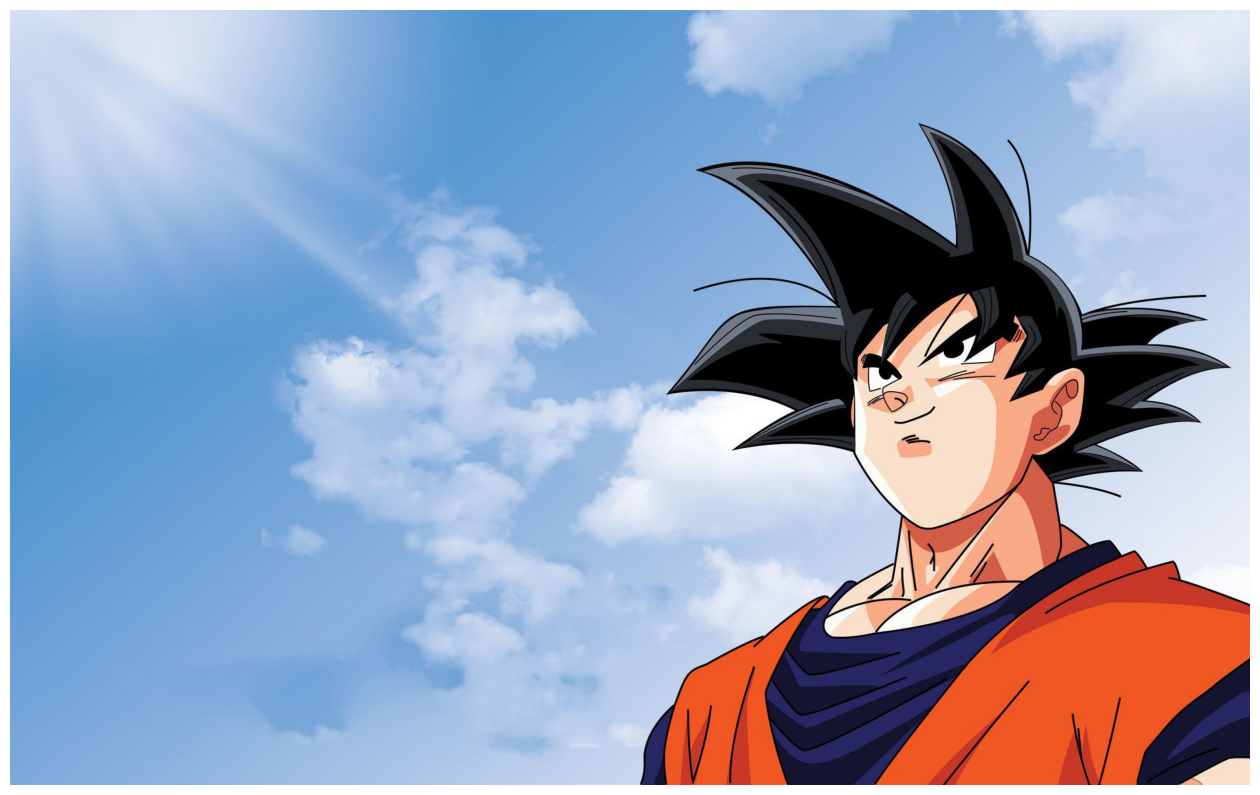

In [73]:
# This cell will display the image
def display_image(arr_image, color_map=None, dim=(16, 24)):
    arr_image = (arr_image - np.min(arr_image)) / (np.max(arr_image) - np.min(arr_image))
    arr_image = np.uint8(arr_image * 255)            
    plt.figure(figsize=dim)
    plt.axis('off')
    plt.imshow(arr_image, cmap=color_map)
    plt.show()
pix = mpimg.imread("./images/Goku.jpg")  # Loaded the image of my favourite character
print("Success! Just finished reading an image into a tensor of order", pix.shape, "\n")
average_rgb = np.mean(pix, axis=(0, 1))
display_image(pix)

(A) Crop the image to 60% of its size symmetrically from the center. Display the resulting image.

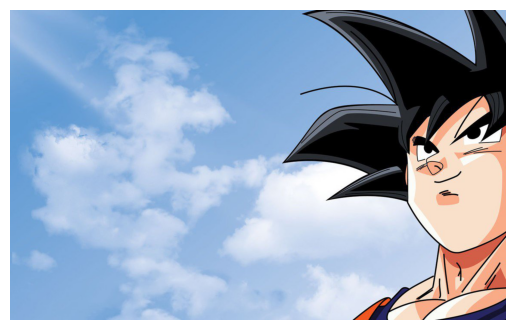

In [75]:
image_route = 'images/Goku.jpg'
image = Image.open(image_route)          
image_np = np.array(image)                     # Convert image to numpy array (tensor of order 3)
height, width, _ = image_np.shape
new_height = int(height * 0.6)               # cropping th dimensions (60% of original size)
new_width = int(width * 0.6)
start_y = (height - new_height) // 2
start_x = (width - new_width) // 2
imageCropped = image_np[start_y:start_y + new_height, start_x:start_x + new_width]       # Cropped the image symmetrically from the center
cropped_image = Image.fromarray(imageCropped)
plt.imshow(cropped_image)
plt.axis('off')  
plt.show()

(B) Display the image upon flipping it horizontally. Left becomes right and right becomes left.

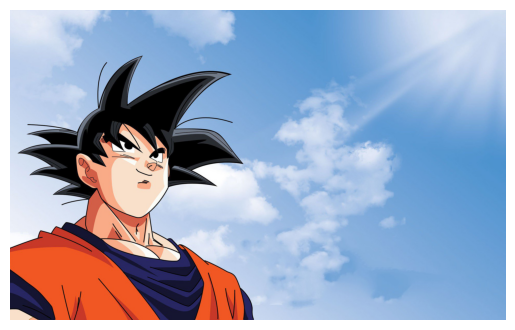

In [77]:
imageFlip = np.copy(image_np)
for i in range(image_np.shape[0]):                      # Reverse the columns for each row
    imageFlip[i] = image_np[i][::-1]           
flipped_image = Image.fromarray(imageFlip)             # Convert the flipped array back to an image
plt.imshow(flipped_image)
plt.axis('off')  
plt.show()

(C) Display the image after flipping it vertically. Top becomes bottom and bottom becomes top.

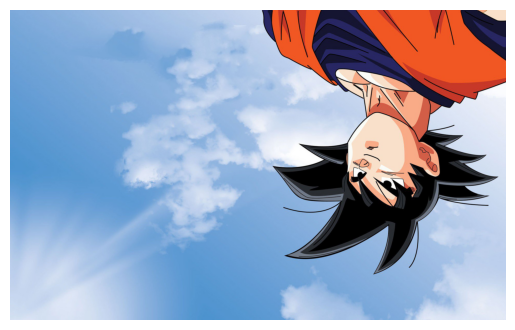

In [79]:
imageVerFlip = np.copy(image_np)
imageVerFlip = image_np[::-1, :, :]                            # Reverse the rows
verticalFlip = Image.fromarray(imageVerFlip)               # Convert the flipped array back to an image
plt.imshow(verticalFlip)
plt.axis('off')
plt.show()

(D) Rotate the image by 90° counter clock-wise. Display the resulting image.

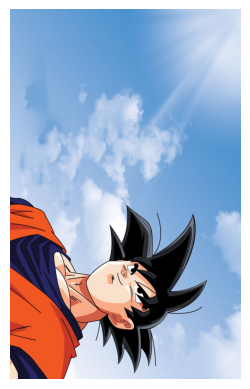

In [99]:
height, width, channels = image_np.shape
imageRotate = np.zeros((width, height, channels), dtype=image_np.dtype)      # Create a new empty array for the rotated image with swapped dimensions
for i in range(height):                     # Fill the new array with rotated pixel values
    for j in range(width):
        imageRotate[j, height - 1 - i] = image_np[i, j]
imageTurn = Image.fromarray(imageRotate)
plt.imshow(imageTurn)
plt.axis('off') 
plt.show()

# Question 2

(A) Modify the code in the function for Gaussian elimination so that it also allows row exchanges in general. Solve the system by using your code.

![Assignment_Sum](Assignment_Sum.png) 


In [85]:
def elimination(A, b):
    A = A.astype(float)  # Ensuring the matrix is of float type
    augA = np.hstack([A, b.reshape(-1, 1)])  # Forming the augmented matrix
    m, n = A.shape   
    for k in range(m):
        max_row_index = np.argmax(np.abs(augA[k:, k])) + k 
        if k != max_row_index:
            augA[[k, max_row_index]] = augA[[max_row_index, k]]
        if np.abs(augA[k, k]) < 1e-15:
            raise ValueError("Matrix is singular or nearly singular")
        augA[k, :] /= augA[k, k]
        for i in range(k + 1, m):
            factor = augA[i, k]
            augA[i, :] -= factor * augA[k, :]
    x = np.zeros(m)
    for i in range(m - 1, -1, -1):
        x[i] = augA[i, -1] - np.dot(augA[i, i + 1:m], x[i + 1:m])   
    return x
    
A = np.array([
    [0, 1, 2],
    [5, -2, 6],
    [3, 1, -2]
])
b = np.array([3, 9, 2])
solution = elimination(A, b)

def display_solution(solution, precision=4):
    variables = ['x1', 'x2', 'x3']
    for i, value in enumerate(solution):
        print(f"{variables[i]} = {round(value, precision)}")

display_solution(solution)

x1 = 1.0
x2 = 1.0
x3 = 1.0


In [86]:
def inverse(A):
    m, n = A.shape
    if m != n:
        raise ValueError("Matrix must be square to compute its inverse.")
    I = np.eye(m)    # Augment A with the identity matrix
    augA = np.hstack([A, I])
    for k in range(m):
        # Find the row with the maximum element in the current column
        max_row_index = np.argmax(np.abs(augA[k:, k])) + k 
        if k != max_row_index:
            augA[[k, max_row_index]] = augA[[max_row_index, k]] 
        if np.abs(augA[k, k]) < 1e-15:              # Check if the pivot element is zero
            raise ValueError("Matrix is singular or nearly singular")
        augA[k, :] /= augA[k, k]
        for i in range(m):      # Eliminated the entries in other rows
            if i != k:
                factor = augA[i, k]
                augA[i, :] -= factor * augA[k, :]
    inverse_A = augA[:, m:]    
    return inverse_A

A = np.array([[1, 1, 4],
              [3, 2, 4], 
              [1, 1, 6]], dtype=float)

inverse_A = inverse(A)
inverse_A

array([[-4. ,  1. ,  2. ],
       [ 7. , -1. , -4. ],
       [-0.5,  0. ,  0.5]])

In [87]:
def determinant(A):
    A = A.astype(float)
    m, n = A.shape
    if m != n:
        raise ValueError("Matrix must be square to compute the determinant.")  
    det = 1
    for k in range(m): 
        max_row_index = np.argmax(np.abs(A[k:, k])) + k       
        if k != max_row_index:
            A[[k, max_row_index]] = A[[max_row_index, k]]
            det *= -1         
        if np.abs(A[k, k]) < 1e-15:    # Check if the pivot element is zero
            return 0        
        det *= A[k, k]   # Multiply by the pivot element
        
        for i in range(k + 1, m):      # Eliminate the entries below the pivot
            factor = A[i, k] / A[k, k]
            A[i, :] -= factor * A[k, :]
    return det

np.random.seed(0) 
random_matrix = np.random.randint(-10, 10, size=(6, 6))
determinant_ge = determinant(random_matrix.copy())    # Determinant using Gaussian elimination
determinant_np = np.linalg.det(random_matrix)         # Determinant using numpy's built-in function
determinant_ge, determinant_np

(3248788.999999999, 3248789.0000000023)